In [14]:
import numpy
import scipy.special

import matplotlib.pyplot
%matplotlib inline
import scipy.misc

# neural network class definition
class neuralNetwork:
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, hiddennodes2, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.hnodes2 = hiddennodes2
        self.onodes = outputnodes
        self.lr = learningrate
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer (i <-> j???)
        self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        self.whh2 = (numpy.random.rand(self.hnodes2, self.hnodes) - 0.5)
        self.wh2o = (numpy.random.rand(self.onodes, self.hnodes2) - 0.5)
        
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list, targets_list2):
        # Convert inputs_list to 2D array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        targets2 = numpy.array(targets_list2, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        hidden_inputs2 = numpy.dot(self.whh2, hidden_outputs)
        hidden_outputs2 = self.activation_function(hidden_inputs2)

        final_inputs = numpy.dot(self.wh2o, hidden_outputs2)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors2 = numpy.dot(self.wh2o.T, output_errors)

        hidden2_errors = targets2 - final_outputs
        
        hidden_errors = numpy.dot(self.whh2.T, hidden_errors2)
        
        # Update weights
        self.wh2o += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs2))
        self.whh2 += self.lr * numpy.dot((hidden_errors2 * hidden_outputs2 * (1.0 - hidden_outputs2)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        hidden_inputs2 = numpy.dot(self.whh2, hidden_outputs)
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        final_inputs = numpy.dot(self.wh2o, hidden_outputs2)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs


In [ ]:
#image_array = numpy.asfarray(all_values[1:]).reshape([28, 28])
#matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
#scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#print(scaled_input)

#all_values = test_data_list[0].split(',')
#input_values = numpy.asfarray(all_values[1:])
#image_array = input_values.reshape([28, 28])
#matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
#n.query(input_values)


In [18]:
# Train

input_nodes = 784
input_nodes2 = 3136
hidden_nodes = 100
hidden_nodes2 = 100
output_nodes = 10
learning_rate = 0.2

n = neuralNetwork(input_nodes2, hidden_nodes, hidden_nodes2, output_nodes, learning_rate)

data_file = open("mnist_train.csv", 'r')
training_data_list = data_file.readlines()
data_file.close()

epochs = 1
for e in range(epochs):
    iRecord = 0
    for record in training_data_list:
        if (iRecord % 10000 == 0):
            print(iRecord)
        iRecord += 1
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        
        inputs2 = numpy.zeros(input_nodes2).reshape([56, 56])
        horshift = int(numpy.random.rand(1) * 28)
        vershift = int(numpy.random.rand(1) * 28)
        inputs2[horshift:(horshift + 28), vershift:(vershift + 28)] = inputs.reshape([28, 28])
        inputs2 = inputs2.reshape([1, input_nodes2])
        
        n.train(inputs2, targets)
        pass
pass

print("Ready")

0
10000
20000
30000
40000
50000
Ready


In [19]:
data_file = open("mnist_test.csv", 'r')
test_data_list = data_file.readlines()
data_file.close()

scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    #print(correct_label, 'Correct label')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0) + 0.01

    inputs2 = numpy.zeros(input_nodes2).reshape([56, 56])
    horshift = int(numpy.random.rand(1) * 28)
    vershift = int(numpy.random.rand(1) * 28)
    inputs2[horshift:(horshift + 28), vershift:(vershift + 28)] = inputs.reshape([28, 28])
    inputs2 = inputs2.reshape([1, input_nodes2])
        
    outputs = n.query(inputs2)
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        #image_array = inputs.reshape([28, 28])
        #matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print("Performance = ", scorecard_array.sum() / scorecard_array.size)

Performance =  0.1608


array([[ 0.45210338],
       [ 0.00133751],
       [ 0.1723494 ],
       [ 0.35569131],
       [ 0.00162753],
       [ 0.16948262],
       [ 0.00810284],
       [ 0.03353375],
       [ 0.18638376],
       [ 0.01606675]])

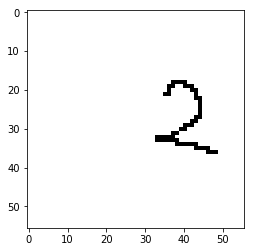

In [8]:
image_file_name = 'myletter2.bmp'
img_array = scipy.misc.imread(image_file_name, flatten=True)
#img_data = 255.0 - img_array.reshape(784)
img_data = 255.0 - img_array.reshape(3136)
img_data = (img_data / 255.0 * 0.6) + 0.02
matplotlib.pyplot.imshow(img_data.reshape([56, 56]), cmap='Greys', interpolation='None')
n.query(img_data)

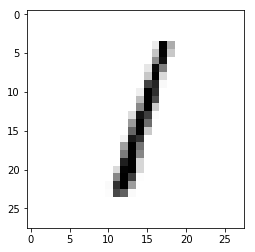

In [69]:
all_values = test_data_list[2].split(',')
inputs = (numpy.asfarray(all_values[1:]) / 255.0) + 0.01
matplotlib.pyplot.imshow((inputs).reshape([28, 28]), cmap='Greys', interpolation='None')

In [32]:
(28 * 2) ** 2

3136

In [23]:
A = numpy.zeros([10, 10])
B = numpy.ones([3, 3])
A[3:6, 3:6] = B
print(A)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
